In [1]:
import pandas as pd
import pylab as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import os

os.chdir('C:\\Analytics\\Personal\\Machine Learning\\Training\\R\\Dataset')

In [3]:
# read the data in
df = pd.read_csv("diabetes.csv")
print(df.columns.values)

['times_pregnant' 'Plasma_glucose_concentration_2 hr' 'blood_pressure'
 ' Triceps_skin_fold_thickness ' ' Hr2_serum_insulin' 'BOI'
 ' Diabetes_pedigree_function' 'Age' 'Class']


In [48]:
print("Summary Statistics :\n",df.describe())

Summary Statistics :
        times_pregnant  Plasma_glucose_concentration_2 hr  blood_pressure  \
count      768.000000                         768.000000      768.000000   
mean         3.845052                         120.894531       69.105469   
std          3.369578                          31.972618       19.355807   
min          0.000000                           0.000000        0.000000   
25%          1.000000                          99.000000       62.000000   
50%          3.000000                         117.000000       72.000000   
75%          6.000000                         140.250000       80.000000   
max         17.000000                         199.000000      122.000000   

        Triceps_skin_fold_thickness    Hr2_serum_insulin         BOI  \
count                     768.000000          768.000000  768.000000   
mean                       20.536458           79.799479   31.992578   
std                        15.952218          115.244002    7.884160   
min  

In [49]:
df.corr()

,times_pregnant,Plasma_glucose_concentration_2 hr,blood_pressure,Triceps_skin_fold_thickness,Hr2_serum_insulin,BOI,Diabetes_pedigree_function,Age,Class
times_pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma_glucose_concentration_2 hr,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps_skin_fold_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Hr2_serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BOI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


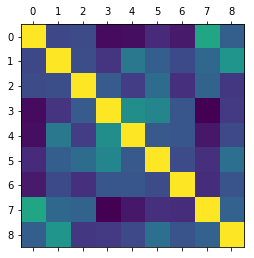

In [50]:
plt.matshow(df.corr())

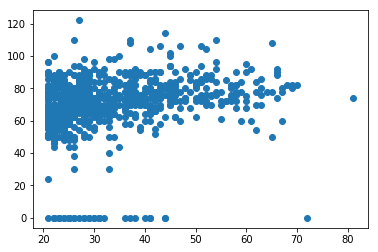

In [51]:
plt.scatter(df['Age'], df['blood_pressure'])
plt.show()

In [52]:
sum(df['Class'].isnull())

0

In [66]:
df.isnull()

,times_pregnant,Plasma_glucose_concentration_2 hr,blood_pressure,Triceps_skin_fold_thickness,Hr2_serum_insulin,BOI,Diabetes_pedigree_function,Age,Class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


{'boxes': [<matplotlib.lines.Line2D at 0x2908a390a90>],
 'caps': [<matplotlib.lines.Line2D at 0x2908a3984e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2908a3a1198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2908a398d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2908a390be0>,
  <matplotlib.lines.Line2D at 0x2908a3980b8>]}

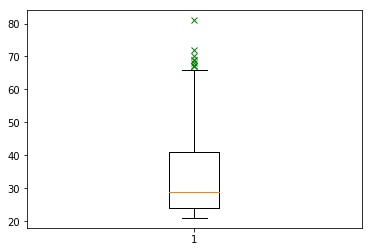

In [53]:
plt.boxplot(df['Age'], sym='gx', notch=False)

{'boxes': [<matplotlib.lines.Line2D at 0x2908a3efda0>],
 'caps': [<matplotlib.lines.Line2D at 0x2908a3f87f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2908a4024a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2908a402080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2908a3efef0>,
  <matplotlib.lines.Line2D at 0x2908a3f83c8>]}

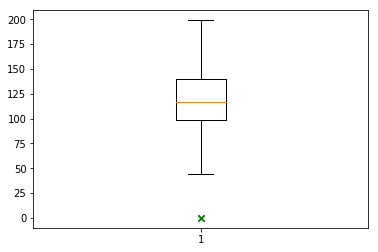

In [54]:
plt.boxplot(df['Plasma_glucose_concentration_2 hr'], sym='gx', notch=False)

In [55]:
x = df['Plasma_glucose_concentration_2 hr'].quantile([0.25,
                                                      0.5,0.75])
print(x.values)
print(x.index)
print(x[.25])
print(x[.5])
print(x[.75])

  

[ 99.   117.   140.25]
Float64Index([0.25, 0.5, 0.75], dtype='float64')
99.0
117.0
140.25


In [56]:
IQR = x[.75] - x[.25]
print(IQR)

IQR15 = 1.5*IQR
IQR15

41.25


61.875

In [57]:
U_W = x[.75] + IQR15
L_W = x[.25] - IQR15

print("Upper Whisker :", U_W)
print("Lower Whisker :", L_W)

Upper Whisker : 202.125
Lower Whisker : 37.125


In [58]:
#Identify outliers
print("Upper Outliers")
df['Plasma_glucose_concentration_2 hr']
[df['Plasma_glucose_concentration_2 hr'] > U_W]

print("Lower Outliers")
df['Plasma_glucose_concentration_2 hr']
[df['Plasma_glucose_concentration_2 hr'] < L_W]

Upper Outliers
Lower Outliers


75     0
182    0
342    0
349    0
502    0
Name: Plasma_glucose_concentration_2 hr, dtype: int64

In [59]:
#Calculating 5 nad 95 percentile  
cap = df['Plasma_glucose_concentration_2 hr'].quantile([0.05,0.95])
cap



0.05     79.0
0.95    181.0
Name: Plasma_glucose_concentration_2 hr, dtype: float64

In [60]:
#Treat outlier with capping and flooring 

df['Plasma_glucose_concentration_2 hr']
[df['Plasma_glucose_concentration_2 hr'] < L_W] = cap[.05]

C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
df['Plasma_glucose_concentration_2 hr']
[df['Plasma_glucose_concentration_2 hr'] == 0]

Series([], Name: Plasma_glucose_concentration_2 hr, dtype: int64)

In [62]:
df.iloc[75]

times_pregnant                        1.00
Plasma_glucose_concentration_2 hr    79.00
blood_pressure                       48.00
 Triceps_skin_fold_thickness         20.00
 Hr2_serum_insulin                    0.00
BOI                                  24.70
 Diabetes_pedigree_function           0.14
Age                                  22.00
Class                                 0.00
Name: 75, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x2908a2ff160>],
 'caps': [<matplotlib.lines.Line2D at 0x2908a2ffeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2908a3573c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2908a29a438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2908a2ff358>,
  <matplotlib.lines.Line2D at 0x2908a2ffc88>]}

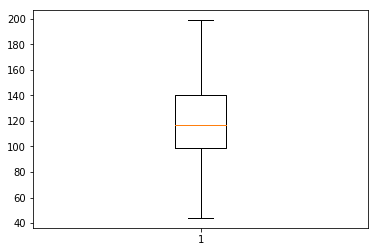

In [63]:
plt.boxplot(df['Plasma_glucose_concentration_2 hr'], sym='gx', notch=False)

In [19]:
# target variable % distribution
print(df['Class'].value_counts(normalize=True))

0    0.651042
1    0.348958
Name: Class, dtype: float64


In [20]:
#build a quick logistic regression model and check the accuracy

X = df.iloc[:,:8] # independent variables
y = df['Class'] # dependent variables

In [21]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=0)

In [22]:
# instantiate a logistic regression model, and fit
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [23]:
# predict class labels for the train set. The predict fuction converts probability values > .5 to 1 else 0
y_pred = model.predict(X_test)

In [24]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [25]:
# generate class probabilities
# Notice that 2 elements will be returned in probs array,

probs = model.predict_proba(X_test)


In [26]:
# 1st element is probability for negative class,
# 2nd element gives probability for positive class
probs

array([[ 0.10927859,  0.89072141],
       [ 0.78972605,  0.21027395],
       [ 0.85929963,  0.14070037],
       [ 0.39128836,  0.60871164],
       [ 0.8255974 ,  0.1744026 ],
       [ 0.92353765,  0.07646235],
       [ 0.32291251,  0.67708749],
       [ 0.25669134,  0.74330866],
       [ 0.59214541,  0.40785459],
       [ 0.62429282,  0.37570718],
       [ 0.45786141,  0.54213859],
       [ 0.1044592 ,  0.8955408 ],
       [ 0.69141999,  0.30858001],
       [ 0.7763338 ,  0.2236662 ],
       [ 0.83010808,  0.16989192],
       [ 0.79492177,  0.20507823],
       [ 0.19582735,  0.80417265],
       [ 0.93029869,  0.06970131],
       [ 0.59223701,  0.40776299],
       [ 0.68591115,  0.31408885],
       [ 0.42864491,  0.57135509],
       [ 0.64675796,  0.35324204],
       [ 0.64309567,  0.35690433],
       [ 0.9036953 ,  0.0963047 ],
       [ 0.89736227,  0.10263773],
       [ 0.62023166,  0.37976834],
       [ 0.91298827,  0.08701173],
       [ 0.17810709,  0.82189291],
       [ 0.82052122,

In [27]:
#probability for positive class
y_pred_prob = probs[:, 1]
y_pred_prob

array([ 0.89072141,  0.21027395,  0.14070037,  0.60871164,  0.1744026 ,
        0.07646235,  0.67708749,  0.74330866,  0.40785459,  0.37570718,
        0.54213859,  0.8955408 ,  0.30858001,  0.2236662 ,  0.16989192,
        0.20507823,  0.80417265,  0.06970131,  0.40776299,  0.31408885,
        0.57135509,  0.35324204,  0.35690433,  0.0963047 ,  0.10263773,
        0.37976834,  0.08701173,  0.82189291,  0.17947878,  0.20571632,
        0.47377633,  0.2786084 ,  0.12780361,  0.47125159,  0.18294841,
        0.6622737 ,  0.47632059,  0.13087299,  0.40192329,  0.69571705,
        0.30413484,  0.2141128 ,  0.23485604,  0.76293297,  0.72398799,
        0.03437191,  0.15882831,  0.28405063,  0.37677809,  0.30495521,
        0.44250422,  0.26239448,  0.80988023,  0.46440197,  0.17920621,
        0.01258427,  0.1124708 ,  0.41106535,  0.30675836,  0.25605168,
        0.63269298,  0.46732318,  0.16765288,  0.7184031 ,  0.6273153 ,
        0.8376399 ,  0.63970273,  0.19587698,  0.40830819,  0.16

In [29]:
# generate evaluation metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.78354978355


In [33]:
# extract false positive, true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


Area under the ROC curve : 0.838785


In [34]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr,
index = i),'1-fpr' : pd.Series(1-fpr, index = i)})

print(roc)

       1-fpr       fpr       tpr
0   1.000000  0.000000  0.013514
1   1.000000  0.000000  0.054054
2   0.993631  0.006369  0.054054
3   0.993631  0.006369  0.067568
4   0.987261  0.012739  0.067568
5   0.987261  0.012739  0.094595
6   0.980892  0.019108  0.094595
7   0.980892  0.019108  0.243243
8   0.974522  0.025478  0.243243
9   0.974522  0.025478  0.310811
10  0.968153  0.031847  0.310811
11  0.968153  0.031847  0.351351
12  0.961783  0.038217  0.351351
13  0.961783  0.038217  0.418919
14  0.949045  0.050955  0.418919
15  0.949045  0.050955  0.432432
16  0.942675  0.057325  0.432432
17  0.942675  0.057325  0.459459
18  0.936306  0.063694  0.459459
19  0.936306  0.063694  0.472973
20  0.929936  0.070064  0.472973
21  0.929936  0.070064  0.513514
22  0.917197  0.082803  0.513514
23  0.917197  0.082803  0.527027
24  0.898089  0.101911  0.527027
25  0.898089  0.101911  0.540541
26  0.872611  0.127389  0.540541
27  0.872611  0.127389  0.554054
28  0.847134  0.152866  0.554054
29  0.8471

In [34]:
#Which Error is Costly??


# Rare Event or Imbalanced Dataset

Providing an equal samples of positive and negative instances to the classification algorithm will result in an optimal result. Datasets that are highly skewed toward one or more classes have proven to be a challenge.

Resampling is a common practice to address the imbalanced dataset issue.

#Random under-sampling - Reduce majority class to match minority class count.

#Random over-sampling - Increase minority class by randomly picking samples within minority class till counts of both class match.

#Synthetic Minority Over-Sampling Technique (SMOTE) - Increase minority class by introducing synthetic examples through connecting all k (default = 5) minority class nearest neighbors using feature space similarity (Euclidean distance).

# Bias and Variance
A fundamental problem with supervised learning is the bias variance trade-off. Ideally a model should have two key characteristics.
1. Sensitive enough to accurately capture the key patterns in the training dataset.
2. It should be generalized enough to work well on any unseen datasets.
Unfortunately, while trying to achieve the above-mentioned first point, there is an ample chance of over-fitting to noisy or unrepresentative training data points leading to a failure of generalizing the model. On the other hand, trying to generalize a model may result in failing to capture important regularities.

### Bias
If model accuracy is low on a training dataset as well as test dataset the model is said to be under-fitting or that the model has high bias. This means the model is not fitting the training dataset points well in regression or the decision boundary is not separating the classes well in classification; and two key reasons for bias are 1) not including the right features, and 2) not picking the correct order of polynomial degrees for model fitting.

To solve an under-fitting issue or to reduced bias, try including more meaningful features and try to increase the model complexity by trying higher-order polynomial fittings.

### Variance
If a model is giving high accuracy on a training dataset, however on a test dataset the accuracy drops drastically, then the model is said to be over-fitting or a model that has high variance. The key reason for over-fitting is using higher-order polynomial degree (may not be required), which will fit decision boundary tools well to all data points including the noise of train dataset, instead of the underlying relationship. This will lead to a high accuracy (actual vs. predicted) in the train dataset and when applied to the test dataset, the prediction error will be high.
To solve the over-fitting issue:

#Try to reduce the number of features, that is, keep only the meaningful features.
#Dimension reduction can eliminate noisy features, in turn, reducing the model variance.
#Brining more data points to make training dataset large will also reduce variance.
#Choosing right model parameters can help to reduce the bias and variance, for example.
   #Using right regularization parameters can decrease variance in regression-based models.
   #For a decision tree reducing the depth of the decision tree will reduce the variance. 

# K-Fold Cross-Validation

K-folds cross-validation splits the training dataset into k-folds without replacement, that is, any given data point will only be part of one of the subset, where k-1 folds are used for the model training and one fold is used for testing. The procedure is repeated k times so that we obtain k models and performance estimates.

In [45]:
from sklearn.cross_validation import cross_val_score

df = pd.read_csv("diabetes.csv")

X = df.iloc[:,:8].values # independent variables
y = df['Class'].values # dependent variables

In [48]:
# Normalize Data
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [49]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=2017)

In [50]:
# build a decision tree classifier
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import train_test_split
clf = tree.DecisionTreeClassifier(random_state=2017)

In [51]:
# evaluate the model using 10-fold cross-validation
train_scores = cross_val_score(clf, X_train, y_train, 
                               scoring='accuracy', cv=5)
test_scores = cross_val_score(clf, X_test, y_test, 
                              scoring='accuracy', cv=5)
print("Train Fold AUC Scores: ", train_scores)
print("Train CV AUC Score: ", train_scores.mean())

Train Fold AUC Scores:  [ 0.7037037   0.63888889  0.65420561  0.6635514   0.71028037]
Train CV AUC Score:  0.674125995154


In [53]:
print("\nTest Fold AUC Scores: ", test_scores)
print("Test CV AUC Score: ", test_scores.mean())


Test Fold AUC Scores:  [ 0.70212766  0.74468085  0.74468085  0.64444444  0.66666667]
Test CV AUC Score:  0.700520094563


# Stratified K-Fold Cross-Validation
An extended cross-validation is the Stratified K-fold cross-validation, where the class proportions are preserved in each fold, leading to better
bias and variance estimates

# Ensemble Methods
Ensemble methods enable combining multiple model scores into a single score to create a robust generalized model.
At a high level there are two types of ensemble methods.
1. Combine multiple models of similar type
     #### Bagging (Bootstrap aggregation)
        Bootstrap aggregation (also known as bagging) was proposed by Leo Breiman in 1994, which is a model aggregation technique to reduce model variance. The training data is split into multiple samples with replacements called bootstrap samples. Bootstrap sample size will be the same as the original sample size, with 3/4th of the original values and replacement result in repetition of values
     
         Independent models on each of the bootstrap samples are built, and the average of the predictions for regression or majority vote for classification is used to create the final model.
 
         Random Forest
         
     #### Boosting
         The core concept of boosting is that rather than an independent individual hypothesis, combining hypotheses in a sequential order increases the accuracy. Essentially, boosting algorithms convert the weak learners into strong learners. Boosting algorithms are well designed to address the bias problems.
         
         At a high level the AdaBoosting (adaptive boosting) process can be divided into three steps.
         1. Assign uniform weights for all data points W0(x) = 1 / N, where N is the total number of training data points.
         2. At each iteration fit a classifier ym(xn) to the training data and update weights to minimize the weighted error function.
         3. The final model.
         
         
         
